# What if the Earth collapses to a black hole, instantaneously?

## Premise
You're standing on the Earth, when it suddenly collapses to a black hole.
Do you fall into the resulting black hole, the size of a peanut?

## Assumptions
You don't die immediately from this mysterious event, so you can experience your fate.
This means:

- This is a non-violent event: no gamma ray burst or accretion disk spewing sterilizing x-rays.
- Ergo, the atmosphere and any resulting debris are inside the black hole. No accretion disk.
- You're wearing a space suit. (Since there's no atmosphere.)
- The resulting black hole has the same mass and angular momentum as the Earth had had.

Also, assume that you're on the equator at the time, since values like radius and rotational speed are easy to find.
(And this is the particular scenario descibed in a podcast.)


In [1]:
import sympy
sympy.init_printing()

upsilon, mu, r, a, T, R_g, c = sympy.symbols("upsilon mu r a T R_g c")

speed = sympy.sqrt(mu * (2/r - 1/a))
speedEq = sympy.Eq(upsilon, speed)

# Solve for "a".
axis = sympy.solve(speedEq, a)[0]
axisEq = sympy.Eq(a, axis)

period = sympy.sqrt(a**3/mu)*2*sympy.pi
periodEq = sympy.Eq(T, period)

schwarzschild = 2 * mu / c**2
schwarzschildEq = sympy.Eq(R_g, schwarzschild)

"r" is distance between the astronaut and the black hole.  
Equation for speed, given semimajor axis ("a"):

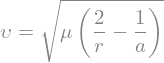

In [2]:
speedEq

Apogee initial conditions (r,v):  
where r = Earth radius at equator, and v = Earth rotation speed at equator.  
Now, solve for the length of semimajor axis:

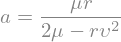

In [3]:
axisEq

Equation for period of an orbit, given semimajor axis:

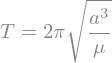

In [4]:
periodEq

Schwarzschild radius:

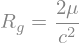

In [5]:
schwarzschildEq

In [6]:
# Earth's standard gravitational parameter (mu = G*M)
muVal = 3.986e14        # units: m^3 / s^2

# Equatorial radius
rVal = 6378137.         # units: m

# Equatorial rotation speed (apogee speed)
upsilonVal = 465.1      # units: m/s

# Speed of light
cVal = 299792458        # units: m/s


# Calculate some key values.
axisFun = sympy.lambdify((mu, r, upsilon), axis)
axisVal = axisFun(muVal, rVal, upsilonVal)
print(f"semimajor axis(a):\t{axisVal:.0f} meters\t(or {axisVal/1000:.3f} km)")

periodFun = sympy.lambdify((a, mu, upsilon), period)
periodVal = periodFun(axisVal, muVal, upsilonVal)
print(f"orbital period(T):\t{periodVal:.0f} secs\t(or {periodVal/60:.2f} mins)")

perigeeVal = 2*axisVal - rVal
print(f"perigee (closest):\t{perigeeVal:.0f} meters\t(or {perigeeVal/1000:.3f} km)")

speedFun = sympy.lambdify((mu, r, a), speed)
perigeeSpeed = speedFun(muVal, perigeeVal, axisVal)
print(f"perigee (fastest):\t{perigeeSpeed:.0f} m/s\t(or {perigeeSpeed/1000:.3f} km/s)")

schwarzschildFun = sympy.lambdify((mu, c), schwarzschild)
blackholeRadius = schwarzschildFun(muVal, cVal)
print(f"blackhole radius :\t{blackholeRadius:.4f} meters\t(or {blackholeRadius*1000:.1f} millimeters)")


semimajor axis(a):	3194597 meters	(or 3194.597 km)
orbital period(T):	1797 secs	(or 29.95 mins)
perigee (closest):	11058 meters	(or 11.058 km)
perigee (fastest):	268272 m/s	(or 268.272 km/s)
blackhole radius :	0.0089 meters	(or 8.9 millimeters)


## Tidal Forces
Assume that you are two meters tall in your space suit. The worst case is if you're oriented along the semimajor axis at perigee.

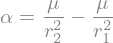

In [7]:
# Assume a two meter tall astronaut, and her center of mass is about halfway.
alpha, r_1, r_2 = sympy.symbols("alpha r_1 r_2")
r1Val = perigeeVal + 1          # one meter farther from black hole
r2Val = perigeeVal - 1          # one meter closer to the black hole
accel = mu/r_2**2 - mu/r_1**2
accelEq = sympy.Eq(alpha, accel)
accelEq

In [8]:
g = 9.807                       # Earth's acceleration of gravity in m/s/s

accelFun = sympy.lambdify((mu, r_1, r_2), accel)
accelVal = accelFun(muVal, r1Val, r2Val)
tidalVal = accelVal/g

print(f"tidal acceleration:\t{accelVal:.0f} m/s/s\t(or {tidalVal:.0f} g)")
print("This is the difference between head and foot; each end experiences half that.")

tidal acceleration:	1179 m/s/s	(or 120 g)
This is the difference between head and foot; each end experiences half that.


## Conclusion
You'll not just fall into the peanut-sized black hole. The closest you'll get is about 11 kilometers.

But -- you'd be moving at almost 270 km/s, while turning the corner very, VERY, quickly. This is a highly eccentric orbit.

So, assuming you're 2m tall: the tidal difference between head and foot could be about 120g. Ouch!

However!!! In the worst case scenario, you would experience these extreme accelerations for only a fraction of a second.
It might be survivable, like experiencing a shock wave on Earth.

In fact, it's so quick that there wouldn't be time for the gravity gradient to align you with "down". So, if your space suit has a jetpack, your best use of it would be to make sure you were not oriented along the semimajor axis. (Even so, you're likely to come out of each close pass spinning.) Unfortunately, you would need to deal with this every 30 mins or so -- until you get rescued.


# Diagrams of the Highly Eccentric Orbit

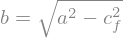

In [9]:
# We also need to calculate the semiminor axis for drawing the following diagrams.
b, c_f = sympy.symbols("b c_f")
minor = sympy.sqrt(a**2 - c_f**2)
minorEq = sympy.Eq(b, minor)
minorEq

In [10]:
# Distance from ellipse center to either focus in meters
centerVal = (rVal - perigeeVal)/2

# Length of semiminor axis in meters
minorFun = sympy.lambdify((c_f, a), minor)
minorVal = minorFun(centerVal, axisVal)
print(f"semiminor axis(b):\t{minorVal:.0f} meters\t(or {minorVal/1000:.3f} km)")

semiminor axis(b):	265570 meters	(or 265.570 km)


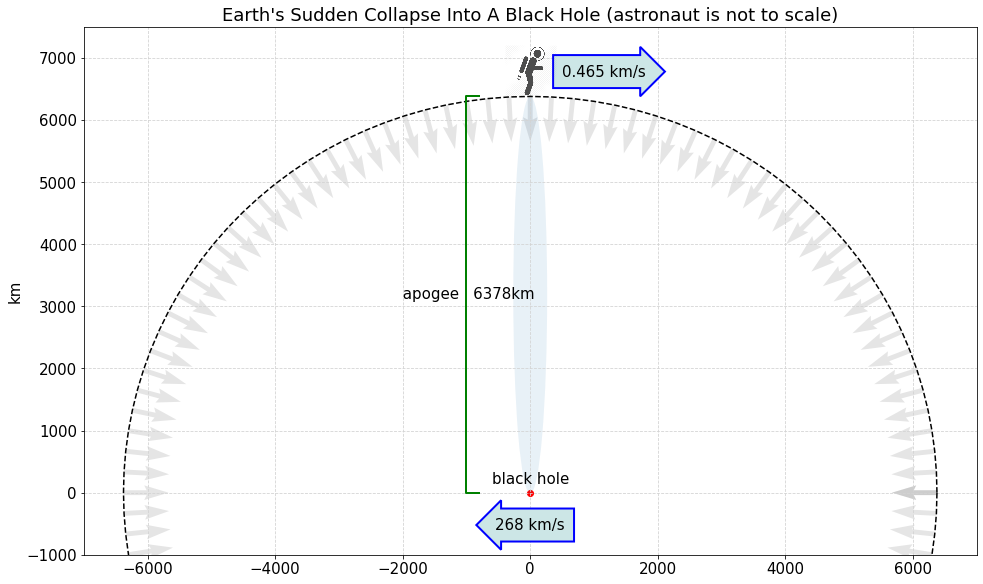

In [11]:
# Support for diagrams.
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as img
im = img.imread('space-suit-icon.jpg')

plt.rc('font', size=15) # bigger font, by default
scale = 1000            # Report distances in km, rather than meters
x_siz = 16              # width of the display canvas

# Size of the diagram, in km
x_max, y_max = 7000, 7500
x_min, y_min = -7000, -1000
y_siz = x_siz * (y_max-y_min)/(x_max-x_min)

fig, ax = plt.subplots(figsize=(x_siz, y_siz))
ax.set_title("Earth's Sudden Collapse Into A Black Hole (astronaut is not to scale)")
ax.set_ylabel('km')

# Define a circle for the Earth.
theta = numpy.linspace(0, 2*numpy.pi, 121)
r = rVal/scale          # units: km
x = r*numpy.cos(theta)
y = r*numpy.sin(theta)

# Dashed line circle, and arrows pointing in
ax.plot(x, y, 'k--')
ax.quiver(x, y, -x, -y, alpha=0.1)

# Astronaut (not to scale)
imagebox = OffsetImage(im, zoom=0.1)
ab = AnnotationBbox(imagebox, (0, r+400), frameon=False)
ax.add_artist(ab)

# Scaled values, using km
apoSpeed  = upsilonVal/scale
periSpeed = perigeeSpeed/scale
majorDist = axisVal/scale
minorDist = minorVal/scale
periDist  = perigeeVal/scale

# Arrowed boxes with text for speeds
bbox_props = dict(fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(500, r + 400, f"{apoSpeed:.3f} km/s", ha="left", va="center", rotation=0, size=15, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)
t = ax.text(0, -400, f"{periSpeed:.0f} km/s", ha="center", va="top", rotation=0, size=15, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.6)

# New orbit ellipse
ellipse = Ellipse((0, centerVal/scale), 2*majorDist, 2*minorDist, angle=90, alpha=0.1)
ax.add_patch(ellipse)

# Black hole indicator as red dot -- (dot for black hole is not to scale)
plt.scatter([0], [0], color="r")
plt.text(0, 100, "black hole", ha='center', va='bottom')
plt.text(-1000, axisVal/1000, f" apogee   {r:.0f}km", ha='center', va='center')
plt.plot([-800,-1000,-1000,-800], [0,0,r,r], color='g', lw=2)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(color='lightgray', linestyle='--')
plt.show()

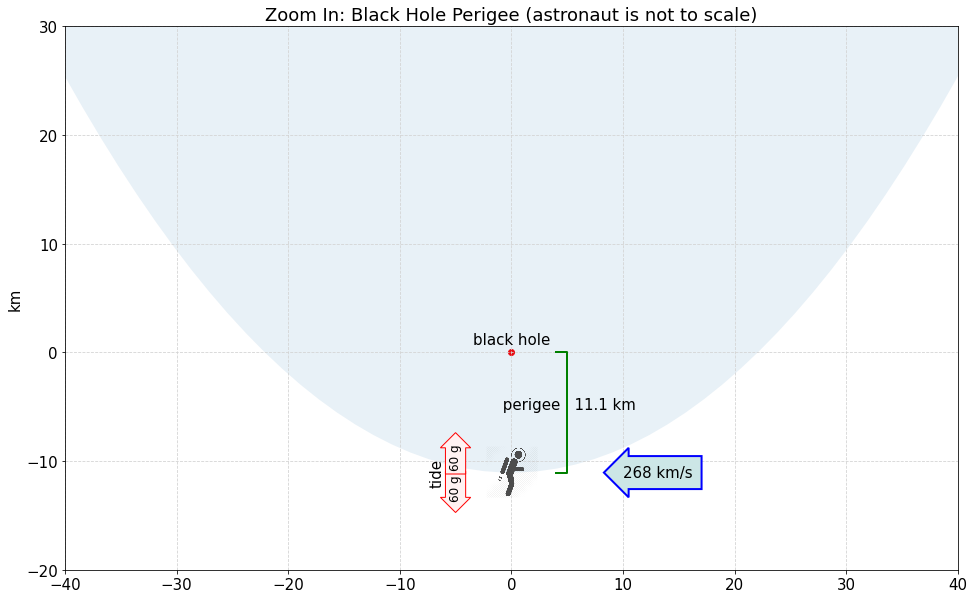

In [12]:
x_max, y_max = 40, 30
x_min, y_min = -40, -20
y_siz = x_siz * (y_max-y_min)/(x_max-x_min)

fig, ax = plt.subplots(figsize=(x_siz, y_siz))
ax.set_title("Zoom In: Black Hole Perigee (astronaut is not to scale)")
ax.set_ylabel('km')

imagebox = OffsetImage(im, zoom=0.1)
ab = AnnotationBbox(imagebox, (0, -perigeeVal/1000), frameon=False)
ax.add_artist(ab)

t = ax.text(10, -periDist, f"{periSpeed:.0f} km/s", ha="left", va="center", rotation=0, size=15, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.6)

bbox_props2 = dict(fc=(1, 0.95, 0.95), ec="r", lw=1)
t = ax.text(-5, -periDist-.2, f"{tidalVal/2:.0f} g", ha="center", va="top", rotation=90, size=12, bbox=bbox_props2)
bb = t.get_bbox_patch()
bb.set_boxstyle("larrow")
t = ax.text(-5, -periDist+.2, f"{tidalVal/2:.0f} g", ha="center", va="bottom", rotation=90, size=12, bbox=bbox_props2)
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow")

ellipse = Ellipse((0, centerVal/scale), 2*majorDist, 2*minorDist, angle=90, alpha=0.1)
ax.add_patch(ellipse)

plt.scatter([0], [0], color="r")
plt.text(0, 0.5, "black hole", ha='center', va='bottom')
plt.text(5, -periDist/2, f" perigee   {periDist:.1f} km", ha='center', va='bottom')
plt.plot([4,5,5,4], [0,0,-periDist,-periDist], color='g', lw=2)
plt.text(-6, -periDist, "tide", ha='right', va='center', rotation=90)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(color='lightgray', linestyle='--')
plt.show()

# Author's Notes

## The astronaut is a pendulum.
My intuition tells me that our astronaut is likely to be spun around by tidal forces every time she encounters perigee, depending on orientation.

But I'm not yet sure how to evaluate the **likely** vs **worst-case** spin scenarios.

## GR effects were not considered.
I have not yet looked into how to evaluate the effect of the following on subsequent orbits:

- GR orbital precession
- frame-dragging (due to Earth's angular momentum)

This would be really cool to investigate. I'd need to do some research for follow-up.  
Given the magnitude for change in size, the black hole would likely be spinning very fast, indeed.

## The Moon's effect may not be negligible.
Everything described above only considers the **Earth**!!
But the Earth and the Moon actually **both** orbit about the barycenter (combined center of mass).

If all of the Earth's mass collapsed into its equivalent-mass black hole, this orbital dynamic would not change.
The resulting black hole would trace out a circle every 28 days with 4700 km radius.  
In the 15 minutes that it would take for our astronaut to fall towards the black hole, the black hole will have been displaced by almost **11 km**!!

This would not likely change the orbit analysis by much since most of the acceleration takes place over a tiny time frame, but it would complicate any calculation of orbital precession, particularly if we consider latitudes away from the equator.

## Final surprise: black hole spin

So: how fast could the black hole be spinning? (Our previous analysis did not need this info.)

According to https://en.wikipedia.org/wiki/Moment_of_inertia_factor, the Earth's moment of inertia factor is about 0.3307.
I have no idea what this factor would be for a black hole; it's just a constant for different mass distributions.

In [13]:
from IPython.display import Latex, Markdown

In [14]:
%%latex
angular moment of inertia: $I$ = (0.3307) $M$ $R^2$, (for Earth) $\\$
angular momentum: $L = I$ $\omega$,  (where $\omega$ is angular velocity) $\\$
So roughly: $\omega$ $\propto$ $\frac{1}{R^2}$, ignoring relativistic effects $\\$

<IPython.core.display.Latex object>

In [15]:
ratio = rVal/blackholeRadius
Markdown(f"As the Earth's radius ($R$) shrinks: {rVal:.3e} $\\ \mapsto\\ $ {blackholeRadius:.4f} meters,\n\n"+
    f"the corresponding tangent velocity grows: {upsilonVal:.1f} $\\ \mapsto\\ $ {upsilonVal*ratio*ratio:.3e} m/s.\n\n"+
    f"That's orders of magnitude faster than the speed of light ($c$): {cVal:.3e} m/s!")

As the Earth's radius ($R$) shrinks: 6.378e+06 $\ \mapsto\ $ 0.0089 meters,

the corresponding tangent velocity grows: 465.1 $\ \mapsto\ $ 2.405e+20 m/s.

That's orders of magnitude faster than the speed of light ($c$): 2.998e+08 m/s!

### Getting the answer
I suppose such calculations could be handled with relativistic equations to get a precise figure, where momentum (mass) must rise as the speed gets asymptotically closer to the speed of light.

But for our purposes, we don't need this: we already have a good enoungh answer for such extreme values: **our black hole is spinning at *nearly* the speed of light**.

If we don't relax the assumption (on conservation of Earth's rotational angular momentum), the Ergosphere and frame-dragging effects could be very interesting.

### Follow-up questions:
- How big is the Ergosphere?
- How could frame-dragging affect the tidal force felt by our astronaut?
- Would frame-dragging mean our astronaut could be kicked into a significantly higher orbit?  
  If so, she could use her jetpack (thrusting away from the black hole) to gain orbital
  angular momentum at perigee, and then wait for the next apogee (now farther out)
  to improve orbit eccentricity, using her remaining Δv more efficiently.